# **Premilinaries**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [9]:
import torch
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["axes.labelweight"] = "bold"

# **Visualization function**

In [26]:
def viz(x, y, labelx, labely):
  plt.figure(figsize=(15,7))
  plt.plot(x.detach().numpy(), y.detach().numpy())
  plt.xlabel(labelx, size=15)
  plt.ylabel(labely, size=15)
  plt.grid()
  plt.show()

# **Softmax**

# **<center>$softmax(x) = \frac{e^{x_i}}{\sum^K_{j=i}e^{x_i}}$</center>**

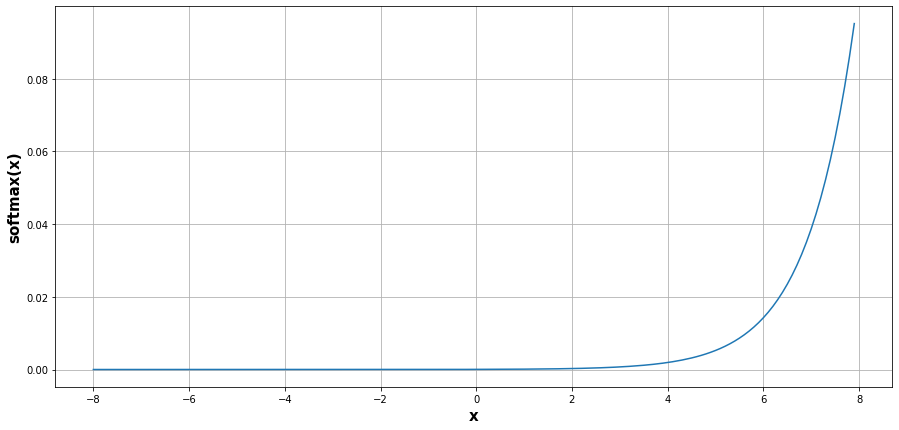

In [64]:
y = torch.nn.Softmax(dim=0)
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
output = y(x)

viz(x, output, 'x', 'softmax(x)')

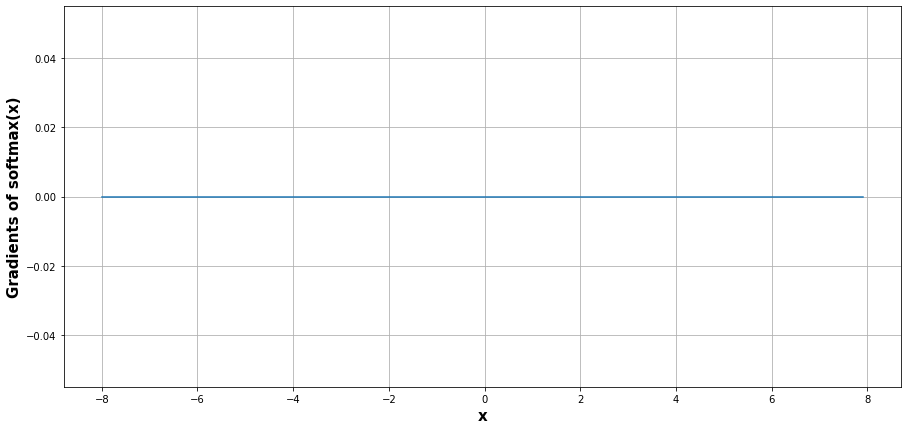

In [65]:
# No previous gradient => no need to clean
output.backward(torch.ones_like(x), retain_graph=True)
viz(x, x.grad, 'x', 'Gradients of softmax(x)')

# **ReLU**


## <center>$ReLU = max(x,0)$<center>

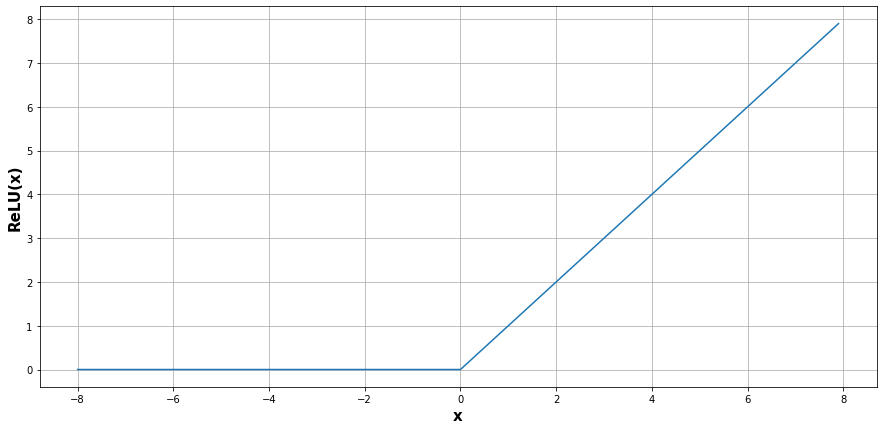

In [66]:
y = torch.relu(x)

viz(x, y, 'x', 'ReLU(x)')

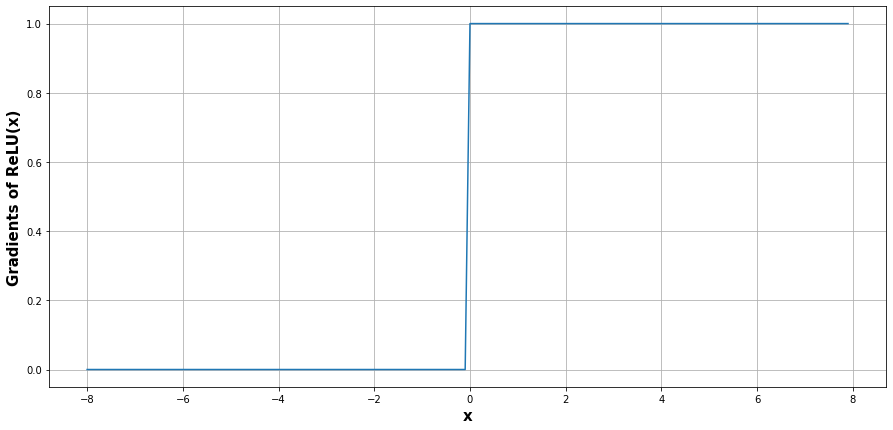

In [67]:
x.grad.data.zero_() # Clear out previous gradient
y.backward(torch.ones_like(x), retain_graph=True)
viz(x, x.grad, 'x', 'Gradients of ReLU(x)')

# ELU

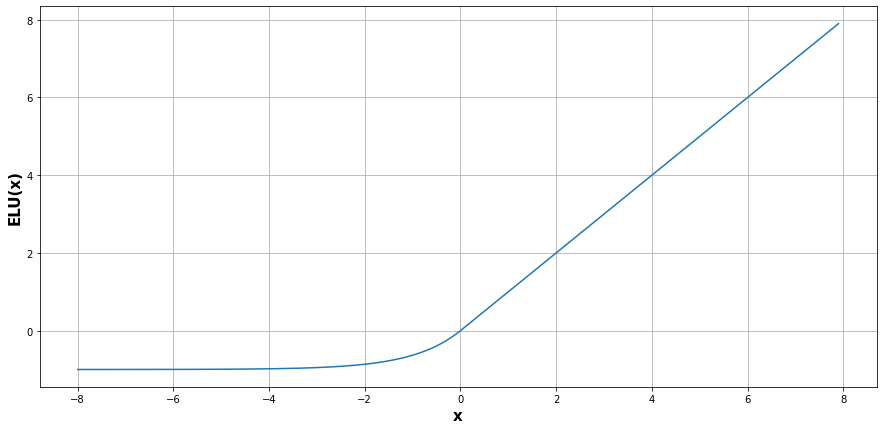

In [68]:
y = torch.nn.ELU()
output = y(x)

viz(x, output, 'x', 'ELU(x)')

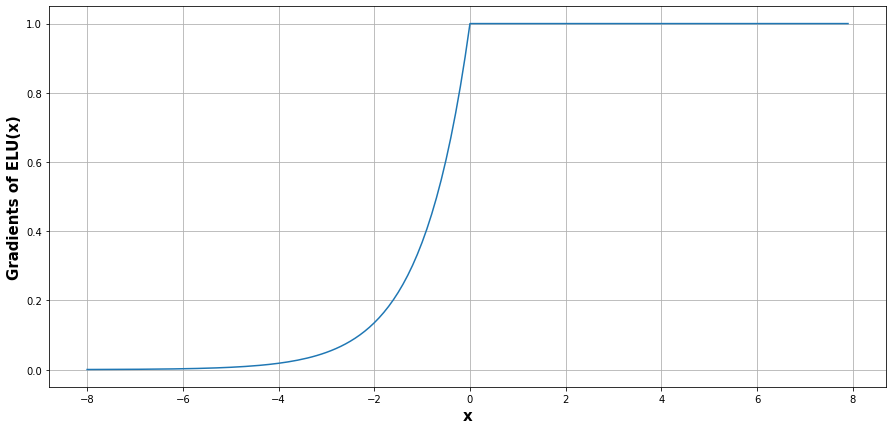

In [70]:
x.grad.data.zero_() # Clear out previous gradient
output.backward(torch.ones_like(x), retain_graph=True)
viz(x, x.grad, 'x', 'Gradients of ELU(x)')

# **Sigmoid**

# **<center>$sigmoid(x) = \frac{1}{1+e^{-x}}$</center>**

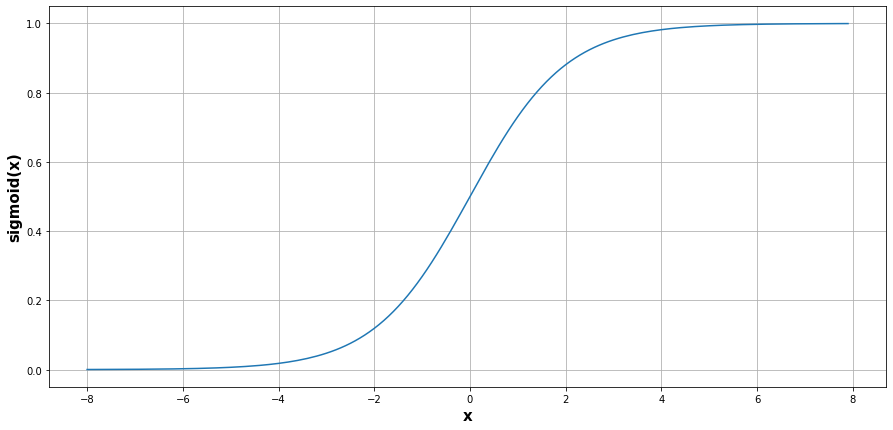

In [42]:
y = torch.sigmoid(x)
viz(x, y, 'x', 'sigmoid(x)')

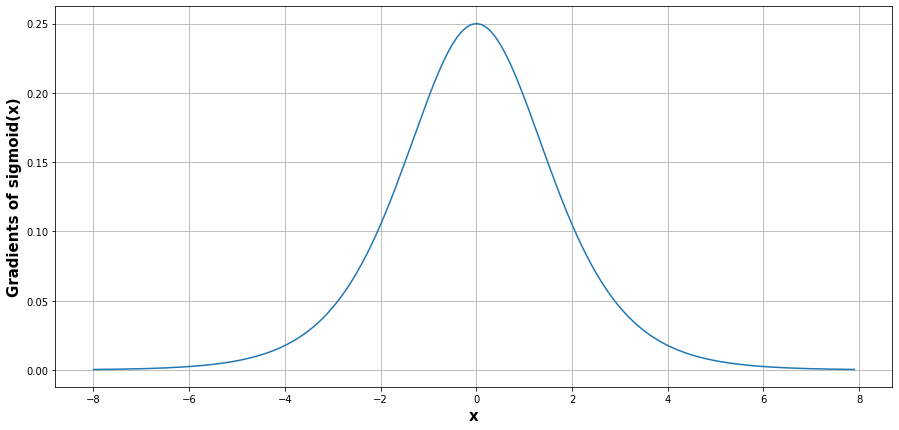

In [43]:
x.grad.data.zero_() # Clear out previous gradient
y.backward(torch.ones_like(x), retain_graph=True)
viz(x, x.grad, 'x', 'Gradients of sigmoid(x)')

# **Tanh**

# **<center>$tanh(x) = \frac{1-e^{-2x}}{1+e^{-2x}}$</center>**

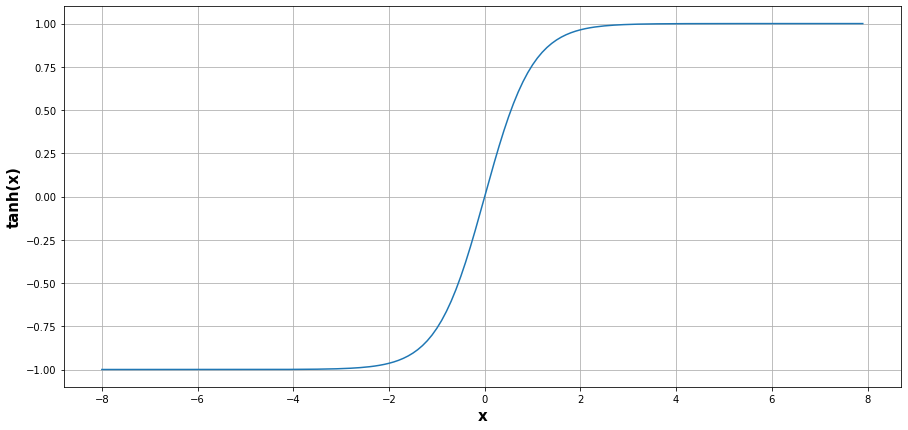

In [44]:
y = torch.tanh(x)
viz(x, y, 'x', 'tanh(x)')

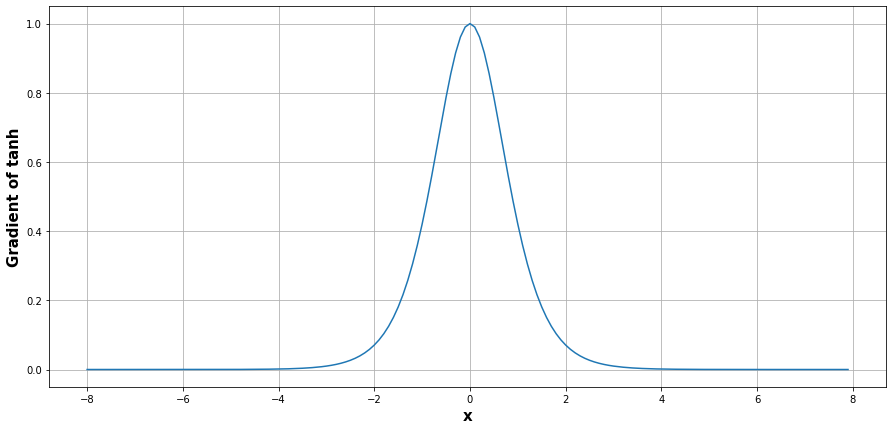

In [45]:
# Clear out previous gradients.
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
viz(x, x.grad, 'x', 'Gradient of tanh')